### Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
data = pd.read_csv('Toyatacorolla.csv')
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [129]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [133]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


#### Handle Missing Values¶

In [136]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [138]:
data = data.dropna() 
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [140]:
# Selecting relevant features
#Selecting numerical columns and a few categorical ones
features = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'cc', 'Doors', 'Gears', 'Weight']
target = 'Price'

In [142]:
X = data[features]
y = data[target]


In [144]:
X

,Age_08_04,KM,Fuel_Type,HP,cc,Doors,Gears,Weight
0,23,46986,Diesel,90,2000,3,5,1165
1,23,72937,Diesel,90,2000,3,5,1165
2,24,41711,Diesel,90,2000,3,5,1165
3,26,48000,Diesel,90,2000,3,5,1165
4,30,38500,Diesel,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,1300,3,5,1025
1432,72,19000,Petrol,86,1300,3,5,1015
1433,71,17016,Petrol,86,1300,3,5,1015
1434,70,16916,Petrol,86,1300,3,5,1015


In [146]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [148]:
# Handling categorical variables
X = pd.get_dummies(X, drop_first=True)
X

,Age_08_04,KM,HP,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,2000,3,5,1165,True,False
1,23,72937,90,2000,3,5,1165,True,False
2,24,41711,90,2000,3,5,1165,True,False
3,26,48000,90,2000,3,5,1165,True,False
4,30,38500,90,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,1025,False,True
1432,72,19000,86,1300,3,5,1015,False,True
1433,71,17016,86,1300,3,5,1015,False,True
1434,70,16916,86,1300,3,5,1015,False,True


In [163]:
# Making predictions
y_pred = model.predict(X_test)
y_pred                

array([10800.,  9950.,  7500.,  9250.,  9750.,  9950.,  9895.,  6750.,
       13450., 12950.,  9900.,  9750., 13500., 11500.,  8950.,  8950.,
       11500., 16950.,  8250.,  6999., 11495., 19500.,  7950., 10750.,
        8950., 16895., 10950.,  7950., 15950., 12950.,  7950.,  9450.,
        7400.,  9450., 10500.,  8700.,  8450.,  8950., 14950.,  9950.,
        9950.,  8950.,  7495.,  5600.,  7500., 18950.,  9250.,  9950.,
        9950., 12750., 14950.,  6750., 15750., 17950.,  7950.,  6650.,
       11500., 11950., 18750., 21950., 11450.,  7350.,  7950., 10950.,
       12495.,  7999., 13950.,  6450.,  7950., 10900., 22000., 11950.,
       13450.,  9000., 20500., 12950.,  8750.,  6650., 10950.,  8950.,
       10500.,  8950., 10950., 10950.,  8950.,  6950., 10500., 12950.,
        8250.,  8750.,  7250.,  8750.,  9450., 11250., 11000.,  9250.,
       24990.,  7250., 12950.,  9750., 10900.,  8950.,  9930., 16250.,
        8450.,  7950., 16950.,  7750.,  9750.,  8500.,  9650.,  4750.,
      

# Dataset Description:

In [170]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [172]:
# Encoding categorical variables
X = pd.get_dummies(data[features], drop_first=True)
y = data[target]

In [174]:
X

,Age_08_04,KM,HP,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,2000,3,5,1165,True,False
1,23,72937,90,2000,3,5,1165,True,False
2,24,41711,90,2000,3,5,1165,True,False
3,26,48000,90,2000,3,5,1165,True,False
4,30,38500,90,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,1025,False,True
1432,72,19000,86,1300,3,5,1015,False,True
1433,71,17016,86,1300,3,5,1015,False,True
1434,70,16916,86,1300,3,5,1015,False,True


In [176]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [178]:
# Checking for multicollinearity using VIF
X = data[['Age_08_04', 'KM', 'HP', 'Weight', 'cc', 'Price']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,Feature,VIF
0,Age_08_04,44.109796
1,KM,8.054810
2,HP,56.049513
3,Weight,221.912987
4,cc,16.598244
5,Price,69.716042


In [180]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [182]:
scaler

StandardScaler()

In [184]:
X_scaled

array([[-1.77196633, -0.57469494, -0.76804185,  1.75856113,  0.99741932,
         0.76376268],
       [-1.77196633,  0.11745379, -0.76804185,  1.75856113,  0.99741932,
         0.83271485],
       [-1.71818412, -0.71538641, -0.76804185,  1.75856113,  0.99741932,
         0.88787659],
       ...,
       [ 0.80957948, -1.37403589, -1.03513832, -1.09191497, -0.65259409,
        -0.6152808 ],
       [ 0.75579727, -1.37670303, -1.03513832, -1.09191497, -0.65259409,
        -0.96004167],
       [ 1.0784905 , -1.82784925,  0.5674405 ,  0.78939926,  0.05455451,
        -1.04278428]])

In [186]:
# Building the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [188]:
# Model Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients

,Feature,Coefficient
0,Age_08_04,9.965739e-14
1,KM,6.269362e-15
2,HP,2.858444e-14
3,Weight,5.579290e-15
4,cc,-2.559939e-17
5,Price,1.000000e+00


In [190]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [192]:
mse,  rmse,  r2

(5.343326252642703e-20, 2.3115635947649597e-10, 1.0)

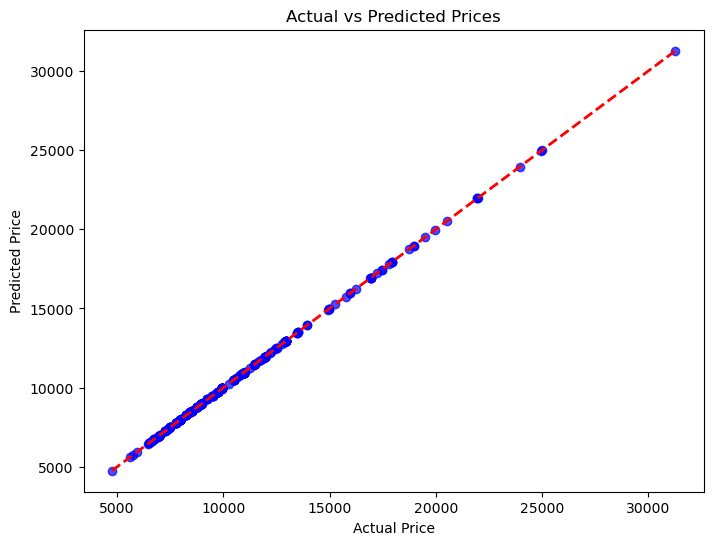

In [194]:
# Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

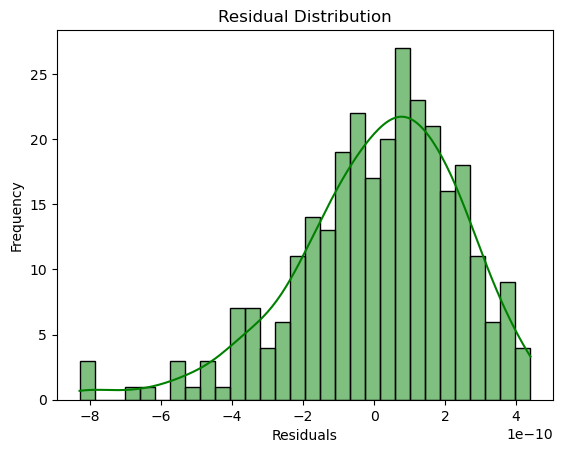

In [196]:
# Residual Analysis
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=30, color='green')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


## Taskes:

### 1.EDA

In [213]:
df=data
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


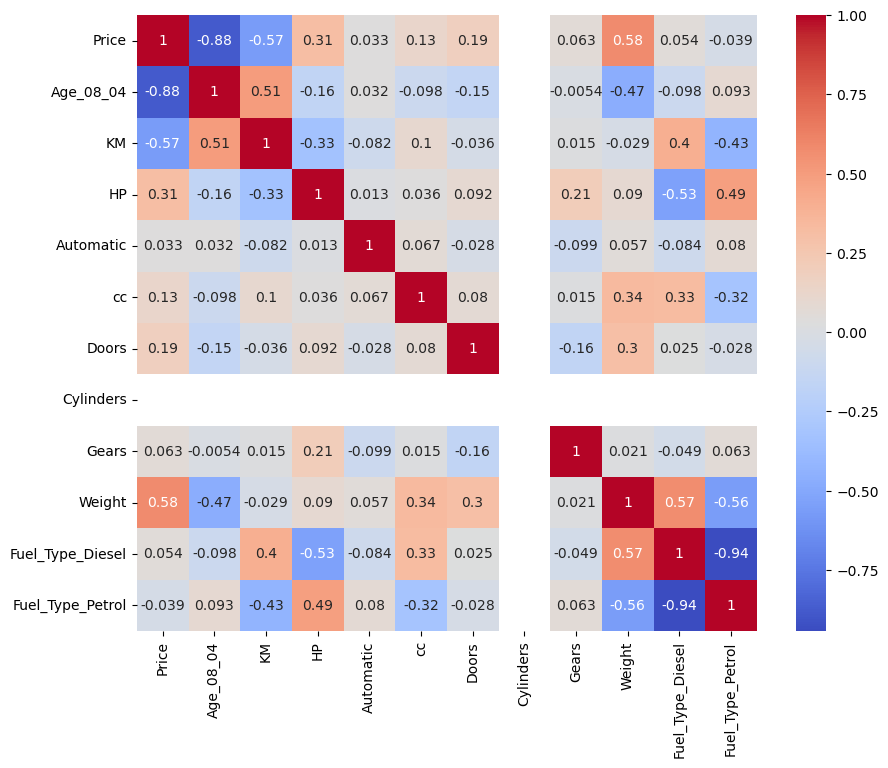

In [248]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

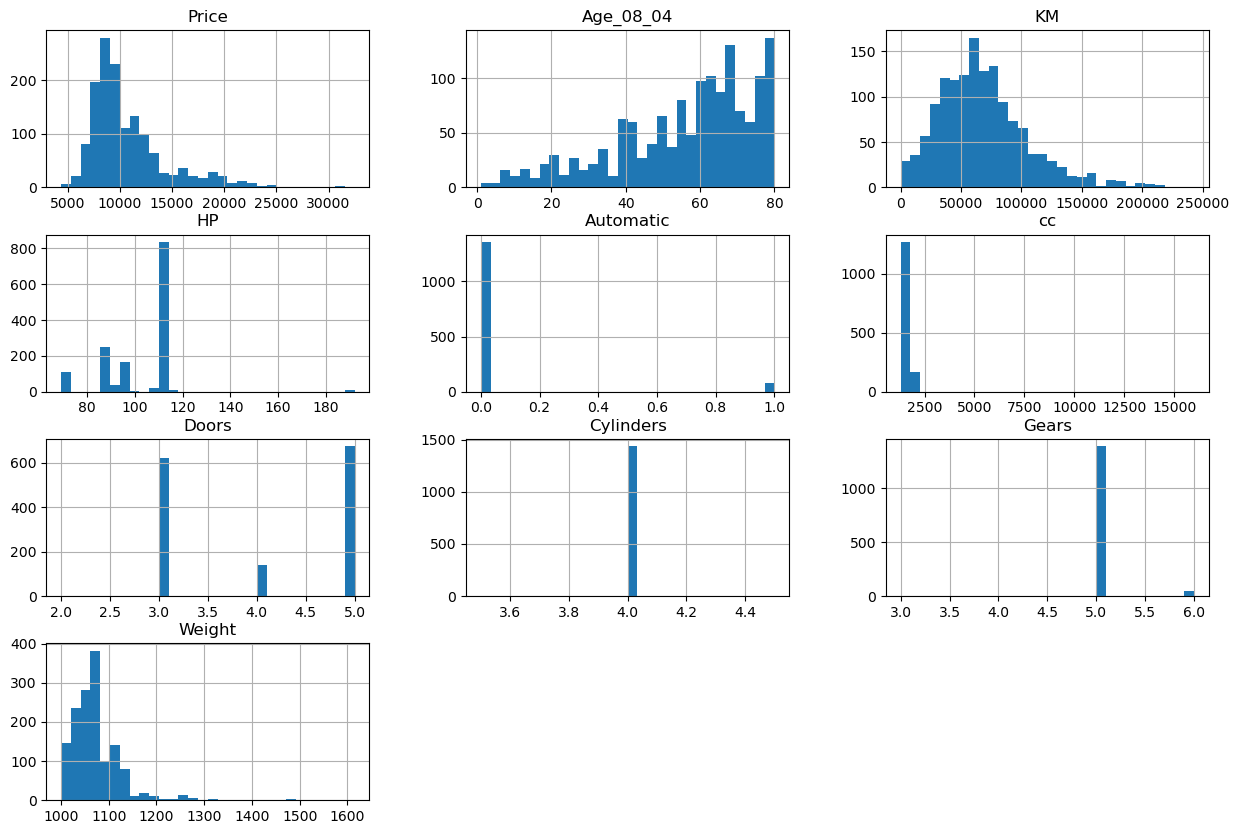

In [217]:
# Visualize distributions
df.hist(bins=30, figsize=(15, 10))
plt.show()

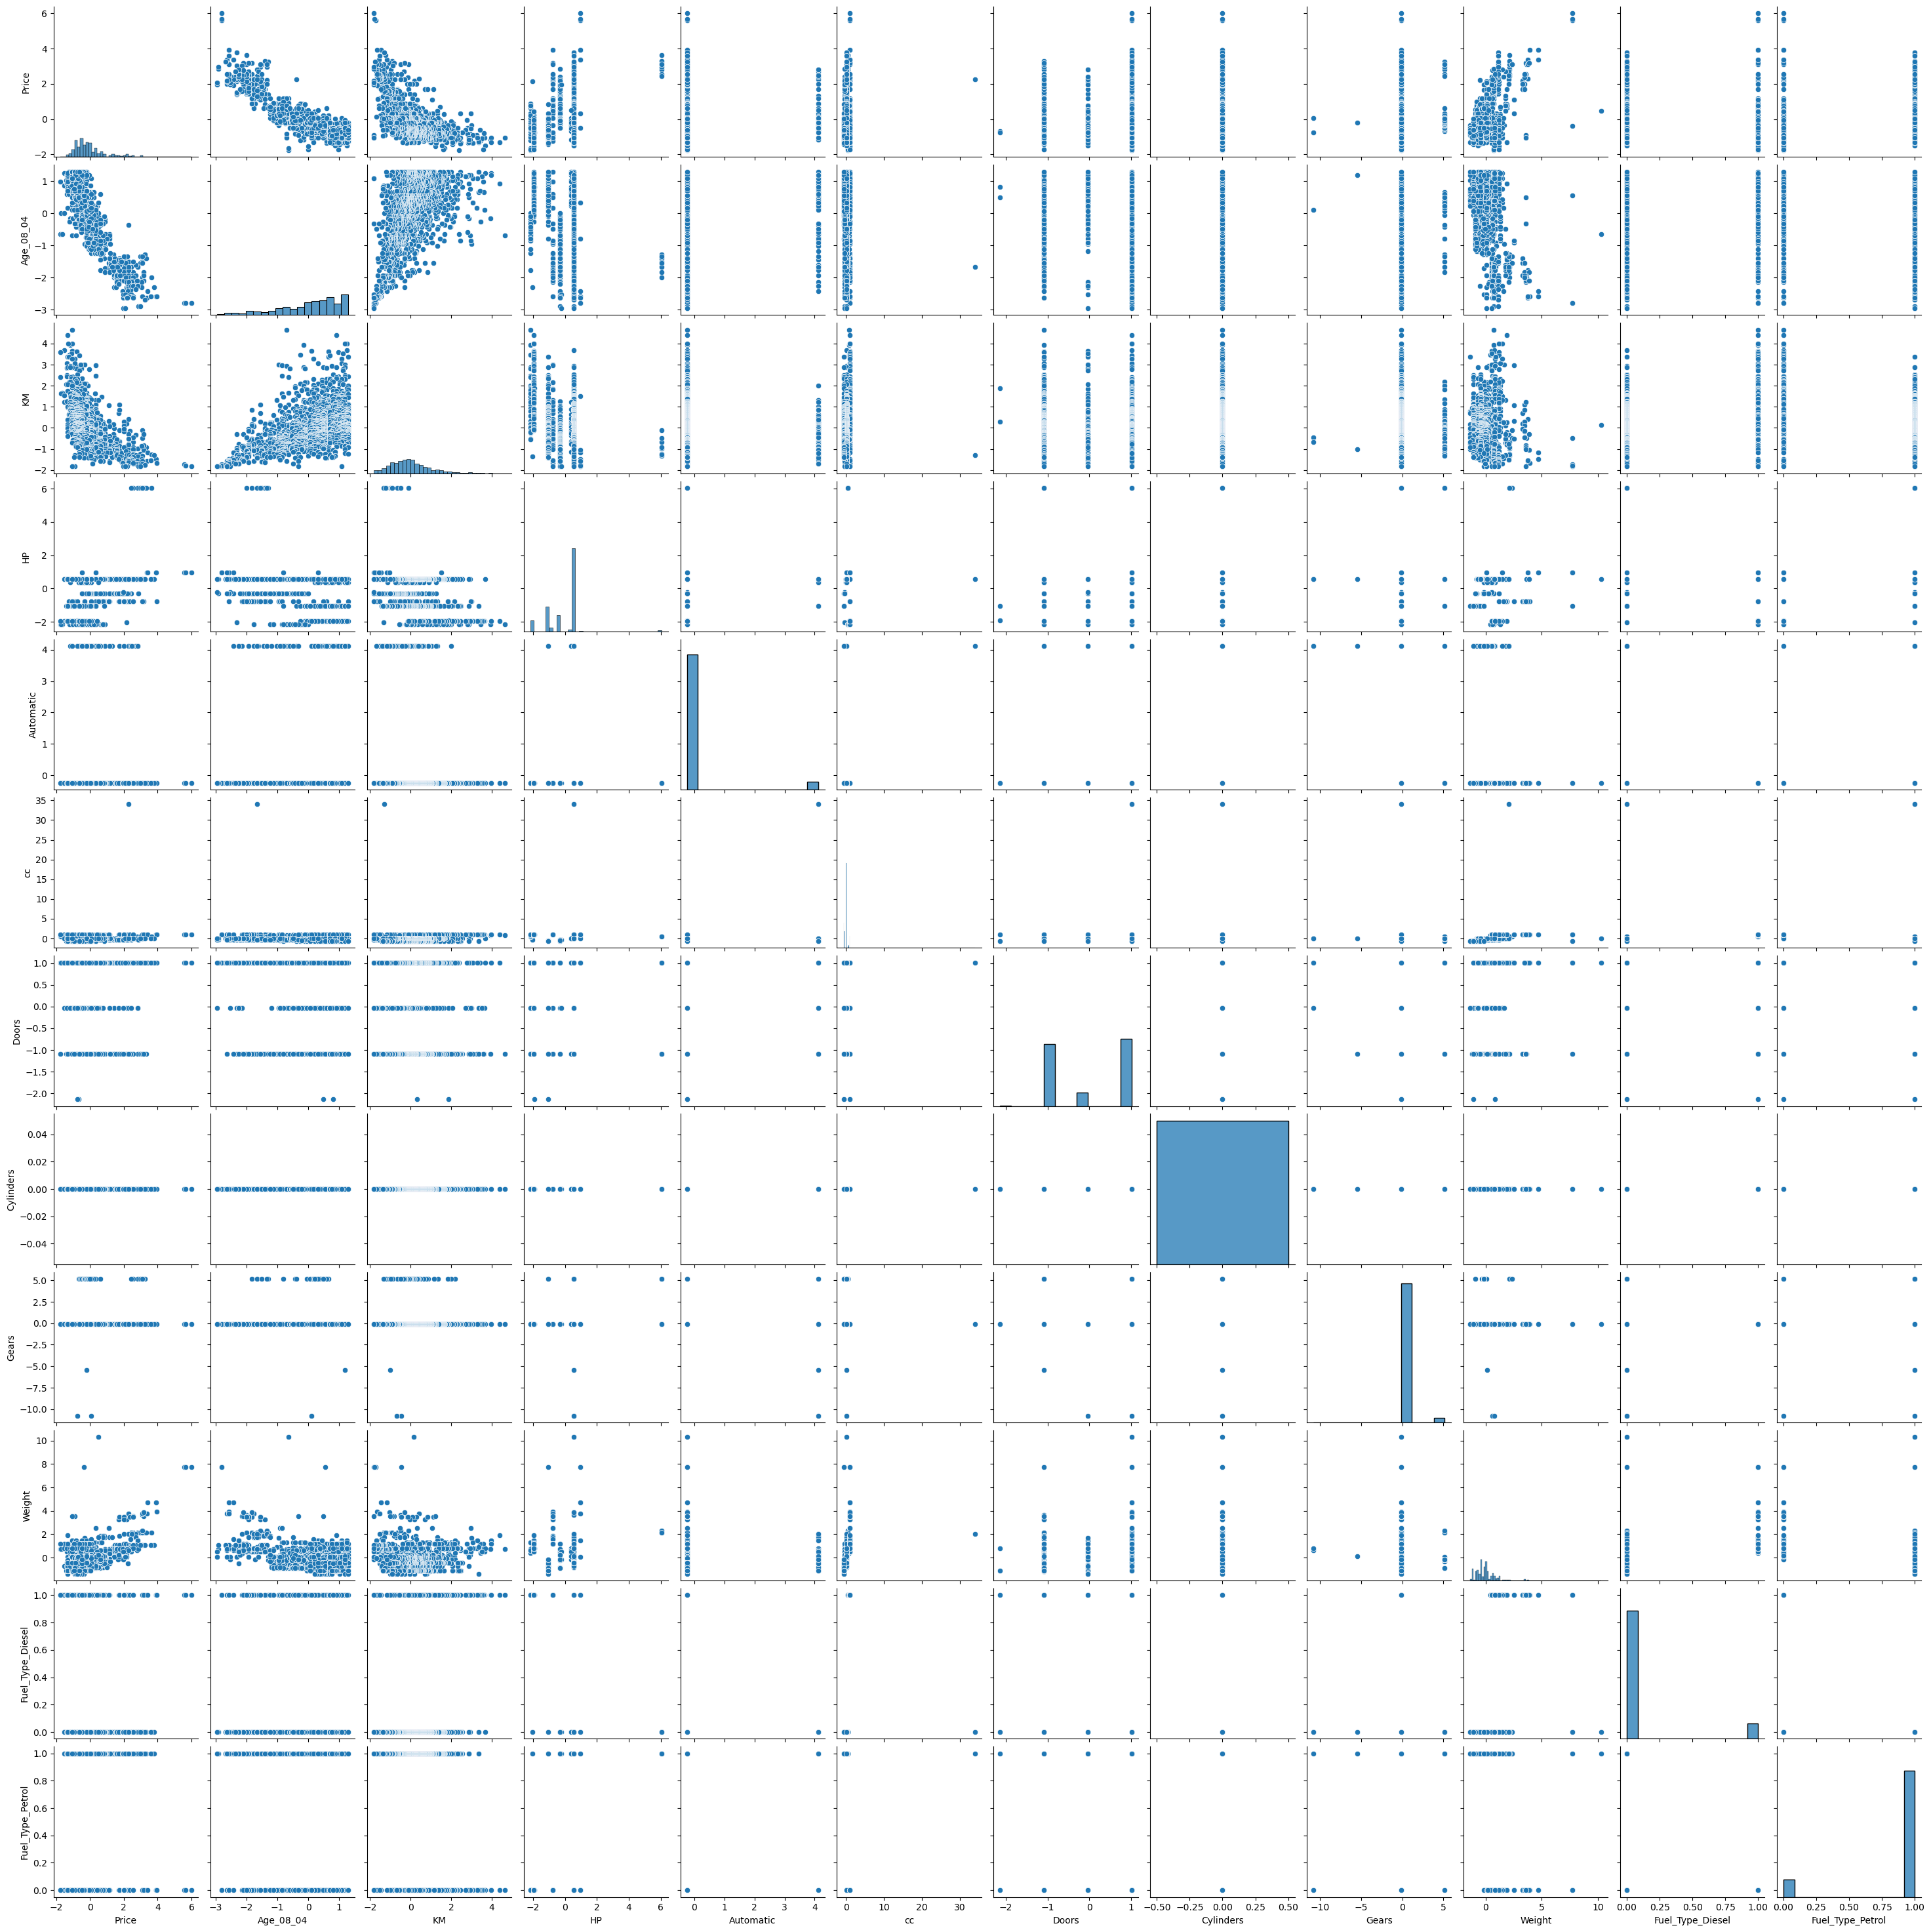

In [223]:
# Visualize relationships (scatter plots for numerical variables)
sns.pairplot(df)
plt.show()

In [220]:
# Encode categorical variables if present
df = pd.get_dummies(df, drop_first=True)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [221]:
# Normalize features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [244]:
numerical_cols

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [246]:
df[numerical_cols]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915


### 2. Split dataset

In [82]:
# Task 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
X_train, X_test, y_train, y_test

(      Age_08_04      KM   HP  Weight    cc  Price
 899          62   59295   86    1035  1300   9500
 881          68   61568  110    1035  1600   9795
 310          40   38653  110    1080  1600  12950
 1145         75  101855  110    1070  1600   6450
 31           22   35199   97    1100  1400  15750
 ...         ...     ...  ...     ...   ...    ...
 1095         76  125778  110    1050  1600   6900
 1130         73  107108  110    1050  1600   7950
 1294         80   71740  110    1070  1600   6950
 860          63   64690   86    1020  1300   9750
 1126         80  110000  110    1035  1600   6800
 
 [1148 rows x 6 columns],
       Age_08_04      KM   HP  Weight    cc  Price
 594          50   22500   97    1025  1400  10800
 754          68   80426  110    1055  1600   9950
 630          59  130000   72    1135  2000   7500
 1259         71   76000  110    1070  1600   9250
 903          65   59000  110    1075  1600   9750
 ...         ...     ...  ...     ...   ...    ...
 17

### 3.Build MLR models

In [87]:
models = []
for features in [
    X_train.columns,
    X_train.columns[:5], 
    X_train.columns[-5:],
]:
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    models.append((model, features)) 

In [89]:
# Interpret coefficients
for idx, (model, features) in enumerate(models):
    print(f"\nModel {idx + 1} Coefficients:")
    for feature, coef in zip(features, model.coef_):
        print(f"{feature}: {coef}")



Model 1 Coefficients:
Age_08_04: 9.965738773430781e-14
KM: 6.26936242478111e-15
HP: 2.858443647357819e-14
Weight: 5.5792903635256954e-15
cc: -2.559938827268326e-17
Price: 0.9999999999999999

Model 2 Coefficients:
Age_08_04: -119.97288243914625
KM: -0.020105659713265916
HP: 29.19496371914971
Weight: 20.084383293097932
cc: -0.10076039262938594

Model 3 Coefficients:
KM: -3.111444158878276e-15
HP: -5.013006718602936e-14
Weight: -1.2742392069950904e-14
cc: 8.053974233653645e-17
Price: 1.0000000000000002


###  4: Evaluate model performance

In [240]:
def evaluate_model(model, features):
    y_pred = model.predict(X_test[features])
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, rmse, r2

In [242]:
mse, rmse, r2

(5.343326252642703e-20, 2.3115635947649597e-10, 1.0)

In [96]:
for idx, (model, features) in enumerate(models):
    mse, mae, rmse, r2 = evaluate_model(model, features)

### 5: Apply Lasso and Ridge

In [228]:
from sklearn.linear_model import Lasso, Ridge

In [230]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)


In [232]:
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)


Ridge()

In [238]:
# Evaluate Lasso and Ridge
lasso_mse, lasso_mae, lasso_rmse, lasso_r2 = evaluate_model(lasso, X_train. columns)
ridge_mse,lasso_mae, ridge_rmse, ridge_r2 = evaluate_model(ridge, X_train. columns)


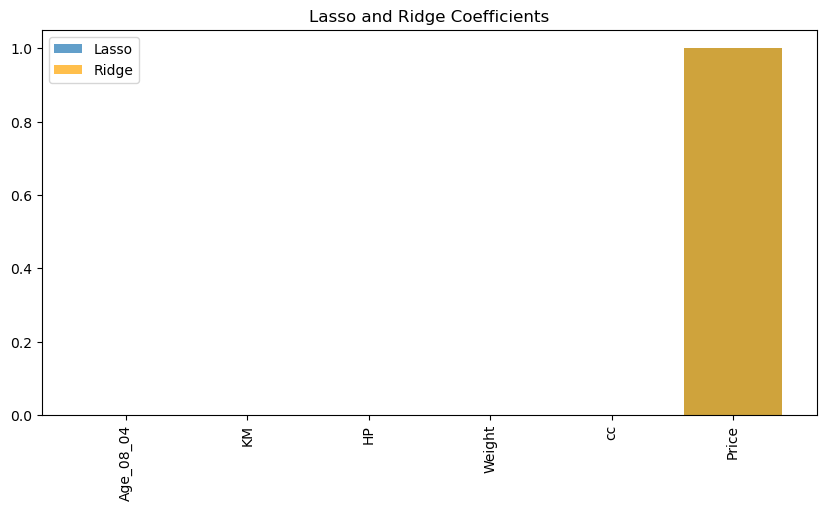

In [236]:
# Plot Lasso and Ridge coefficients
plt.figure(figsize=(10, 5))
plt.bar(X_train.columns, lasso.coef_, alpha=0.7, label="Lasso")
plt.bar(X_train.columns, ridge.coef_, alpha=0.7, label="Ridge", color='orange')
plt.xticks(rotation=90)
plt.title("Lasso and Ridge Coefficients")
plt.legend()
plt.show()

## Interview Questions

#### 1.What is Normalization & Standardization and how is it helpful?

### A. Normalization 

##### Normalization scales the data into a fixed range, usually [0, 1] or [-1, 1], depending on the transformation method used. It ensures that all the features have the same scale.

#### Formula:

#### x′ = x-min(x)/max(x)-min(x)

##### where:
##### x: Original value
##### min(x): Minimum value in the feature
##### max(x): Maximum value in the feature

#### Advantages:

###### Retains the distribution shape of the data.
###### Useful for algorithms that calculate distances (e.g., KNN, K-means). 

#### Example:

##### For a feature with values ranging from 100 to 1000, normalization would scale all the values into the range [0, 1].



### B. Standardization

##### Standardization transforms the data to have a mean of 0 and a standard deviation of 1, creating a standard normal distribution.

#### Formula:

#### z= x−μ/σ
###### x: Original value
###### μ: Mean of the feature
###### Standard deviation of the feature

#### Advantages:

###### Handles outliers better than normalization since it doesn't constrain values to a fixed range
###### Useful for algorithms that assume normally distributed data (e.g., logistic regression, SVMs).

#### Example:

##### For a feature with mean = 50 and standard deviation = 10, a value of 60 would be standardized to:
#### z= 60−50/10 =1

### 2.What techniques can be used to address multicollinearity in multiple linear regression?

#### 1. Variance Inflation Factor (VIF) Analysis

###### Description: Calculate the VIF for each independent variable to quantify the degree of multicollinearity.
###### Compute VIF=1/1-R2' where R2 is the coefficient of determination when regressing the variable against all others.
###### A VIF > 5 or 10 typically indicates high multicollinearity.
###### Action: Remove or modify variables with high VIF values.

#### 2. Remove Highly Correlated Variables

###### Description: Identify pairs of highly correlated independent variables (e.g., with a correlation coefficient > 0.8) and remove one from each pair.
##### Steps:
###### Compute a correlation matrix of all independent variables.
###### Drop variables contributing redundantly to the model.

#### 3. Combine Variables (Feature Engineering)

###### Description: Combine correlated variables into a single feature using techniques like
###### Averaging: Create an average of correlated variables.
###### Principal Component Analysis (PCA): Reduce the dimensionality of the dataset while retaining most variance.

#### 4. Regularization Techniques

###### Description: Use regression methods that shrink or penalize coefficients to handle multicollinearity:
###### Ridge Regression: Adds a penalty term proportional to the square of the magnitude of coefficients  (𝜆∑𝛽𝑖2λ∑β i2).
###### Lasso Regression: Adds a penalty proportional to the absolute magnitude of coefficients (λ∑∣βi∣), which can shrink some coefficients to zero.
###### Elastic Net: Combines Ridge and Lasso penalties.

#### 5. Centering and Scaling

###### Description: Standardize the variables by centering them (subtracting the mean) and scaling them (dividing by standard deviation).
###### Benefits: Reduces the impact of multicollinearity, especially in interaction terms.

#### 6. Drop Redundant Features

###### Description: Use domain knowledge to determine which predictors are redundant and remove them from the model.
###### enefits: Simplifies the model and eliminates unnecessary complexity

 #### 7. Increase Sample Size

###### Description: If feasible, collect more data. Larger sample sizes can mitigate the impact of multicollinearity on coefficient estimates
###### Caveat: This approach is not always practical or cost-effective.

#### 8. Use Partial Least Squares Regression

###### Description: A dimensionality-reduction technique similar to PCA but specifically designed for regression problems.
###### Benefits: Handles multicollinearity by projecting predictors into a smaller set of uncorrelated components.

 #### 9. Respecify the Model

###### Description: Reformulate the regression model by:
###### Removing unnecessary interaction terms.
###### Adding domain-specific constraints or assumptions.

# END THE ASSIGNMENT.......